In [8]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris['data'][:, 2:4]
y = iris['target']

In [2]:
x = x[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [3]:
from sklearn import svm

clf = svm.SVC(C=float("inf"), kernel='linear')
clf.fit(x, y)
clf.predict([[2.4, 3.1]])    # Predicting the label for 1 data point

array([1])

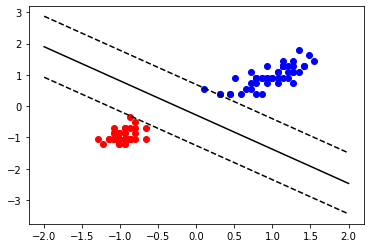

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

clf.fit(x_scaled, y)

plt.scatter(x_scaled[:, 0][y==1], x_scaled[:, 1][y==1], c='b')
plt.scatter(x_scaled[:, 0][y==0], x_scaled[:, 1][y==0], c='r')

# ploting the sv line
# w0 * x0 + w1 * x1 + b = 0
# x1 = -w0/w1 * x0 - b/w0

x0 = np.linspace(-2, 2, 1000)
w0 = clf.coef_[0][0]
w1 = clf.coef_[0][1]
b = clf.intercept_[0]
x1 = -w0/w1 * x0 - b/w0
margin = 1/w1

plt.plot(x0, x1, 'k-')
plt.plot(x0, x1 + margin, 'k--')
plt.plot(x0, x1 - margin, 'k--')
plt.show()
